# **Practical Lab 6 - Logistic Regression**

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## **Loading data**

In [105]:
df_iris = datasets.load_iris(as_frame=True)

X = df_iris.data
y = df_iris.target

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## **Data Preprocessing**

In [106]:
y = pd.DataFrame(df_iris.target_names[df_iris.target] == "virginica", columns=["target"])

df = X.join(y)

df_verginica = df[df["target"] == True]
df_non_verginica = df[df["target"] == False]


print("Descriptive statistics for class 'Virginica':")
df_verginica.describe()

Descriptive statistics for class 'Virginica':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


- Virginica boasts the longest sepals (6.59 cm) and petals (5.55 cm) on average, exceeding other Iris types.
- Standard deviations across features indicate some size variation within the virginica class.
- Ranges for sepal and petal lengths (4.90-7.90 cm, 4.50-6.90 cm) show potential overlap with other classes, especially for smaller virginica flowers.

In [107]:
print("Descriptive statistics for class 'Non-virginica':")
df_non_verginica.describe()

Descriptive statistics for class 'Non-virginica':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


- Non-virginica flowers are generally smaller than virginica, with an average sepal length of 5.47 cm and petal length of 2.86 cm.
- There's moderate size variation within the class, with some overlap with virginica, especially for larger non-virginica flowers.
- Size alone might not be enough for reliable identification due to this overlap.

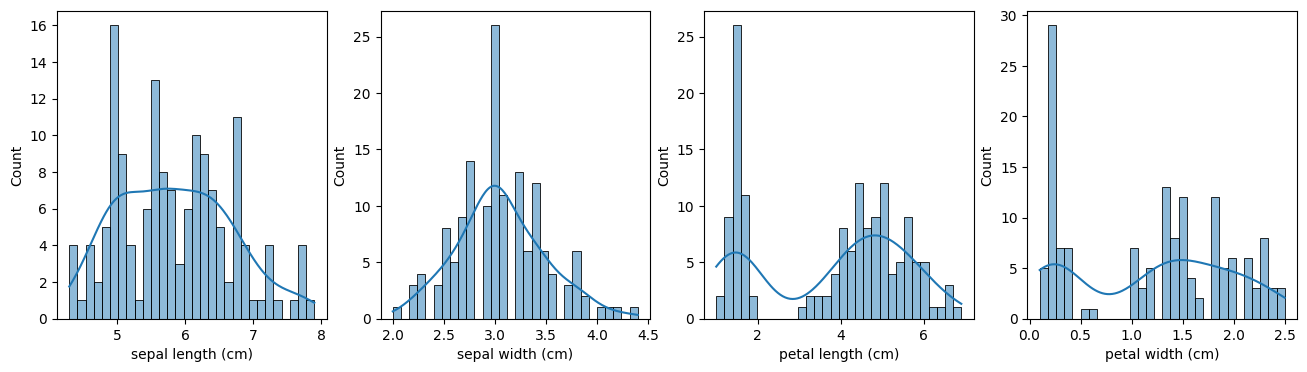

In [108]:

features = df.columns

_, axis = plt.subplots(ncols=4, nrows=1, figsize=(16,4))
for i in  range(len(features)-1):
    sns.histplot(data=df[features[i]], bins=30,kde=True,ax=axis[i], )

We can clearly see that sepal length and sepal width has normal distribution, however petal length and petal width are not. However, we have a significant difference between the two groups of petals

Text(0.5, 0, 'Features')

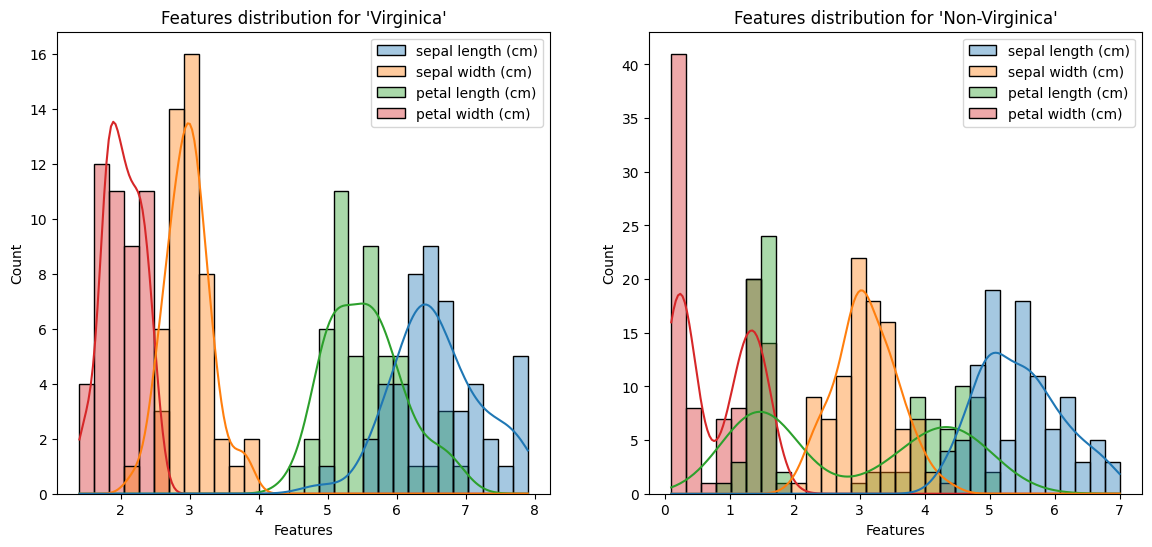

In [109]:
_, axis = plt.subplots(ncols=2, nrows=1, figsize=(14,6))
sns.histplot(data=df_verginica[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]], alpha=0.4, bins=30,kde=True,label = "Virginica",ax=axis[0])
axis[0].set_title("Features distribution for 'Virginica'")
axis[0].set_xlabel("Features")
sns.histplot(data=df_non_verginica[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]], alpha=0.4, bins=30,kde=True,label = "Virginica",ax=axis[1])
axis[1].set_title("Features distribution for 'Non-Virginica'")
axis[1].set_xlabel("Features")


- Iris virginica flowers tend to be larger than non-virginica flowers.
- There's a positive correlation between flower features, meaning larger sepals tend to have wider sepals and longer petals.

<Axes: >

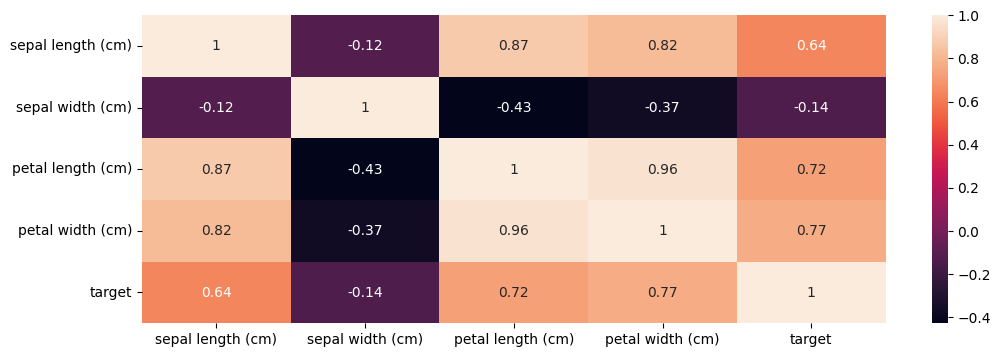

In [110]:
_, ax = plt.subplots(figsize = (12,4))
sns.heatmap(data=df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)", "target"]].corr(), annot=True)

- The data shows that there is a negative correlation between sepal length and both petal length (-0.87) and petal width (-0.82). This means that as sepal length increases, petal length and width tend to decrease.
- On the other hand, there is a strong positive correlation between sepal width and petal width (0.96), indicating that as sepal width increases, petal width also tends to increase.
- Petal length and petal width exhibit a very strong positive correlation (0.96), meaning that as petal length increases, petal width increases proportionally.

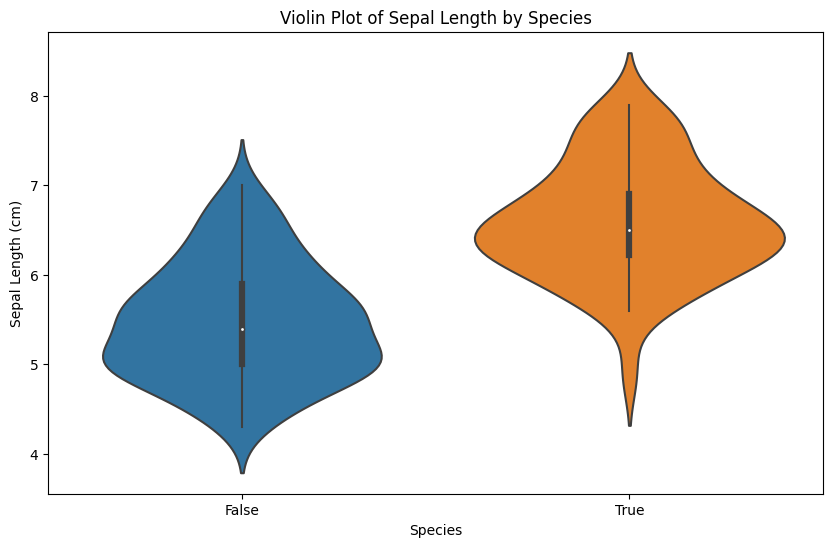

In [111]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='sepal length (cm)', data=df)
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()


Iris species show clear differences in sepal & petal size distributions. Virginica tends larger, with distinct spread in measurements. This suggests using these features for identification, but some overlap requires caution. 

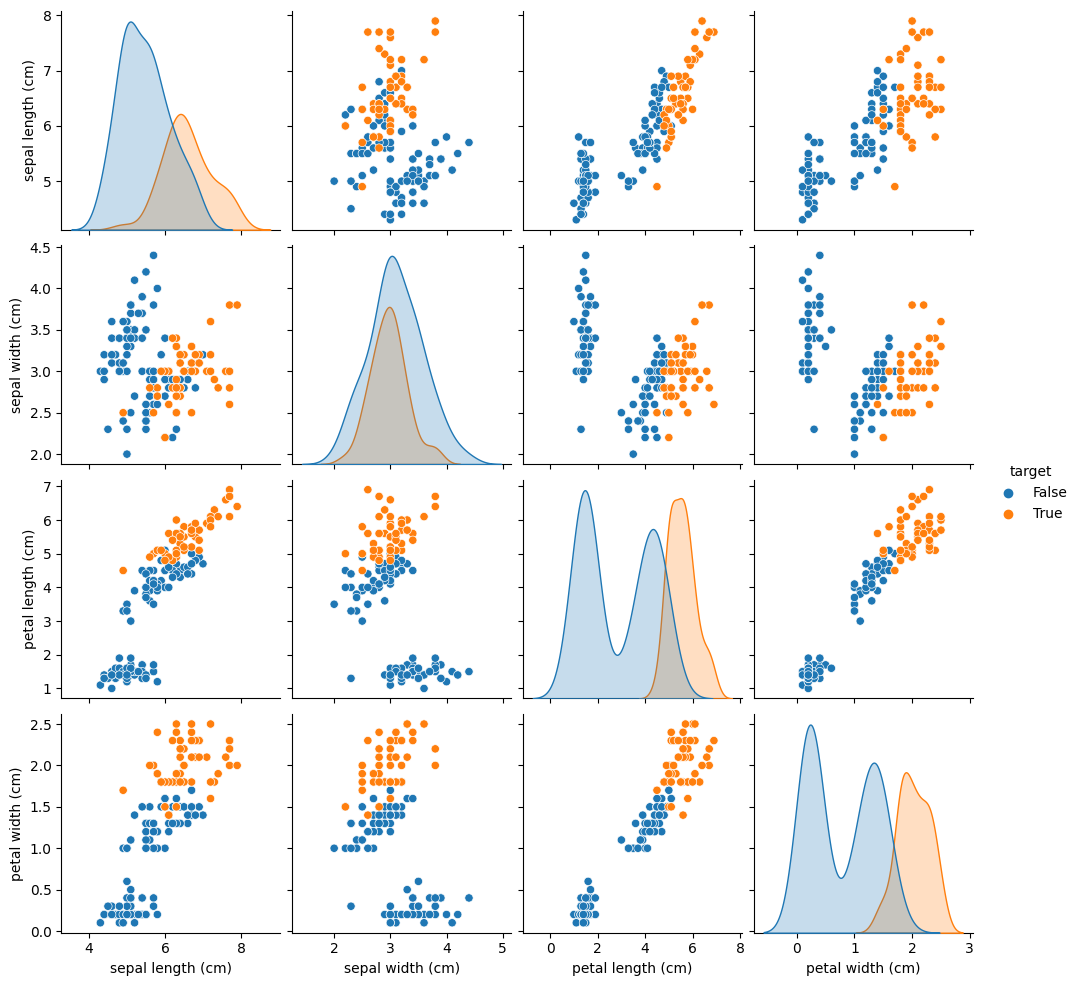

In [112]:
sns.pairplot(data=df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)","target" ]], hue="target")

Source: [https://www.kaggle.com/code/benhamner/python-data-visualizations](https://www.kaggle.com/code/benhamner/python-data-visualizations)

Text(0.5, 1.0, 'Petal width Vs. Petal')

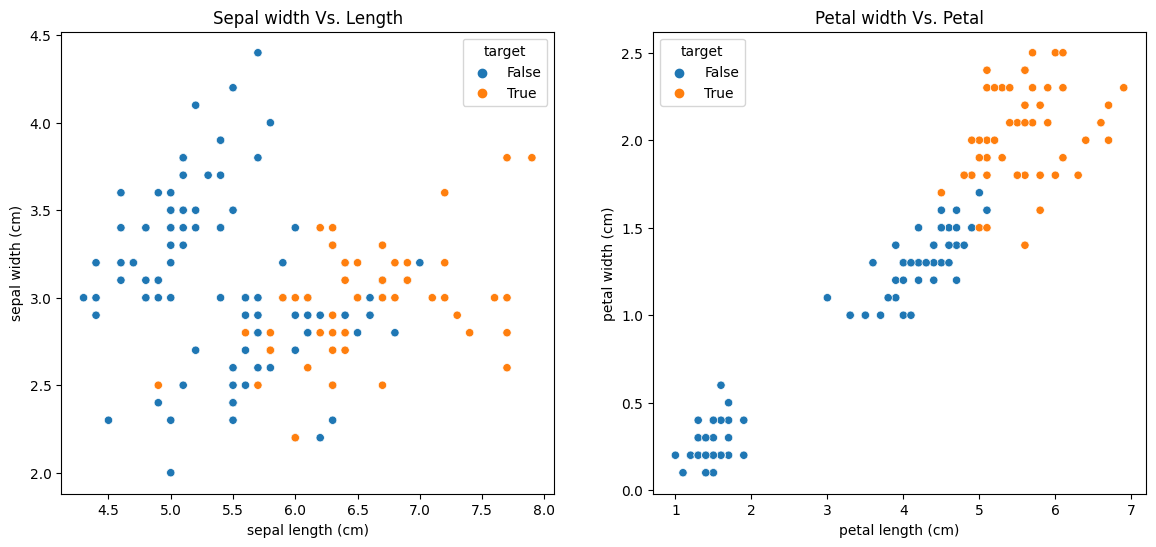

In [113]:
["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)","target" ]
_, ax = plt.subplots(ncols=2, figsize=(14,6))
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)" ,hue='target',ax=ax[0])
ax[0].set_title("Sepal width Vs. Length")
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)" ,hue='target',ax=ax[1])
ax[1].set_title("Petal width Vs. Petal")

## **Splitting the data**

In [114]:
df_train, df_test = train_test_split(df,test_size= 0.2, random_state=100)
df_test, df_validation = train_test_split(df_test, test_size=0.5,random_state=47)

len(df_train), len(df_test), len(df_validation) #check the data split

(120, 15, 15)

# Preparing Models

As corelation of target feature with independent feature are petal width, petal length, sepal length and sepal width in decending order our model will be as follow,
1. petal width vs target
2. (petal width, petal length) vs. target
3. (petal width, petal length, sepal length) vs. target
4. (petal width, petal length, sepal length, sestal width) vs. target


## 1. **Petal width vs target**

In [115]:
# Features : ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)","target" ]
model_feature_1 = LogisticRegression(random_state=45)
model_feature_1.fit(df_train[['petal width (cm)']], df_train['target'])

LogisticRegression(random_state=45)

In [116]:
pd.DataFrame({
    "Instance": range(1,len(df_validation)+1),
    "Probability %": (model_feature_1.predict_proba(df_validation[['petal width (cm)']])[:,1]*100).astype(int),
    "Prediction of Virginica": model_feature_1.predict(df_validation[['petal width (cm)']]),
    "Ground Truth  of Virginica": df_validation['target']
})

,Instance,Probability %,Prediction of Virginica,Ground Truth of Virginica
97,1,17,False,False
15,2,0,False,False
73,3,12,False,False
40,4,0,False,False
69,5,8,False,False
26,6,0,False,False
128,7,83,True,True
135,8,91,True,True
146,9,69,True,True
145,10,91,True,True


In [117]:
print(f"Model 1 accuracy is {accuracy_score(df_validation['target'],model_feature_1.predict(df_validation[['petal width (cm)']]))}")

Model 1 accuracy is 1.0


In [118]:
decision_boundary = -model_feature_1.intercept_ / model_feature_1.coef_
decision_boundary

array([[1.68953398]])

## 2. **(Petal width, petal length) vs. target**

In [119]:
model_feature_2 = LogisticRegression(random_state=45)
model_feature_2.fit(df_train[['petal width (cm)', 'petal length (cm)']], df_train['target'])

LogisticRegression(random_state=45)

In [120]:
pd.DataFrame({
    "Instance": range(1,len(df_validation)+1),
    "Probability %": (model_feature_2.predict_proba(df_validation[['petal width (cm)', 'petal length (cm)']])[:,1]*100).astype(int),
    "Prediction of Virginica": model_feature_2.predict(df_validation[['petal width (cm)', 'petal length (cm)']]),
    "Ground Truth of Virginica": df_validation['target']
})

,Instance,Probability %,Prediction of Virginica,Ground Truth of Virginica
97,1,8,False,False
15,2,0,False,False
73,3,17,False,False
40,4,0,False,False
69,5,2,False,False
26,6,0,False,False
128,7,93,True,True
135,8,98,True,True
146,9,67,True,True
145,10,89,True,True


In [121]:
print(f"Model 2 accuracy is {accuracy_score(df_validation['target'],model_feature_2.predict(df_validation[['petal width (cm)', 'petal length (cm)']]))}")

Model 2 accuracy is 1.0


## 3. **(Petal width, petal length, sepal length) vs. target**

In [122]:
model_feature_3 = LogisticRegression(random_state=45)
model_feature_3.fit(df_train[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']], df_train['target'])

LogisticRegression(random_state=45)

In [123]:
pd.DataFrame({
    "Instance": range(1,len(df_validation)+1),
    "Probability %": (model_feature_3.predict_proba(df_validation[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']])[:,1]*100).astype(int),
    "Prediction of Virginica": model_feature_3.predict(df_validation[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']]),
    "Ground Truth of Virginica": df_validation['target']
})

,Instance,Probability %,Prediction of Virginica,Ground Truth of Virginica
97,1,7,False,False
15,2,0,False,False
73,3,17,False,False
40,4,0,False,False
69,5,2,False,False
26,6,0,False,False
128,7,93,True,True
135,8,98,True,True
146,9,66,True,True
145,10,87,True,True


In [124]:
print(f"Model 3 accuracy is {accuracy_score(df_validation['target'],model_feature_3.predict(df_validation[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']]))}")

Model 3 accuracy is 1.0


## 4. **(Petal width, petal length, sepal length, sepal width) vs. target**

In [125]:
model_feature_4 = LogisticRegression(random_state=45)
model_feature_4.fit(df_train[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']], df_train['target'])

LogisticRegression(random_state=45)

In [126]:
pd.DataFrame({
    "Instance": range(1,len(df_validation)+1),
    "Probability %": (model_feature_4.predict_proba(df_validation[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']])[:,1]*100).astype(int),
    "Prediction of Virginica": model_feature_4.predict(df_validation[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']]),
    "Ground Truth of Virginica": df_validation['target']
})



,Instance,Probability %,Prediction of Virginica,Ground Truth of Virginica
97,1,7,False,False
15,2,0,False,False
73,3,17,False,False
40,4,0,False,False
69,5,2,False,False
26,6,0,False,False
128,7,94,True,True
135,8,98,True,True
146,9,70,True,True
145,10,87,True,True


In [127]:
print(f"Model 4 accuracy is {accuracy_score(df_validation['target'],model_feature_4.predict(df_validation[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']]))}")

Model 4 accuracy is 1.0


## **Best model selection**

As accuracy of all models is 1 we really cannot say  which one is the best. However, training models with more data can affect the accuracy of the model.